In [1]:
# GDP Growth Forecasting Argentina
 
# This notebook aims to predict the growth of Argentina's GDP using a Linear Regression model.
# This is the first part of a series of notebooks that will explore different models and techniques to predict the GDP growth of Argentina.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Read csv with macro data
df = pd.read_csv('../data/processed/argentina_macro_data.csv')
df.head()

,Year,GDP (constant 2015 US$) [Billions],"Inflation, consumer prices (annual %)","Unemployment, total (total labor force %) (modeled ILO estimate)",Real interest rate (%),"Central government debt, total (GDP %)",General government final consumption expenditure (GDP %),Exports of goods and services (GDP %),Imports of goods and services (GDP %),Population growth (annual %),"Industry (including construction), value added (GDP %)","Foreign direct investment, net inflows (GDP %)",Real effective exchange rate index (2020 = 100)
0,1993,338.818,10.61,10.10,7.531021,35.072250,13.510378,6.909352,9.313800,1.357966,27.338740,1.179803,440.284675
1,1994,358.592,4.18,11.76,7.010090,35.603637,13.186904,7.529949,10.604397,1.347024,26.754559,1.411953,443.392500
2,1995,348.389,3.38,18.80,14.231110,36.508456,13.349456,9.680410,10.091013,1.317554,26.301210,2.173928,415.655833
3,1996,367.644,0.16,17.11,10.568740,43.018033,12.501678,10.428597,11.077872,1.260411,26.592561,2.553203,407.585833
4,1997,397.464,0.53,14.82,9.751650,34.500000,12.062014,10.560850,12.775329,1.198264,27.179151,3.127878,419.630000


In [4]:
# In this linear regression model, we will only use the GDP and the year as the variables.
# First, we will create a new DataFrame with only the GDP and the year.
gdp_data = df[['Year', 'GDP (constant 2015 US$) [Billions]']]

In [5]:
# First glance of csv, check everything is in order. Keep in mind data was cleaned before.
gdp_data.head()

,Year,GDP (constant 2015 US$) [Billions]
0,1993,338.818
1,1994,358.592
2,1995,348.389
3,1996,367.644
4,1997,397.464


In [6]:
# Check number of rows and columns
print(f"Dataset contains {gdp_data.shape[0]} rows and {gdp_data.shape[1]} columns.")

Dataset contains 31 rows and 2 columns.


In [7]:
# Check data types
gdp_data.dtypes

Year                                    int64
GDP (constant 2015 US$) [Billions]    float64
dtype: object

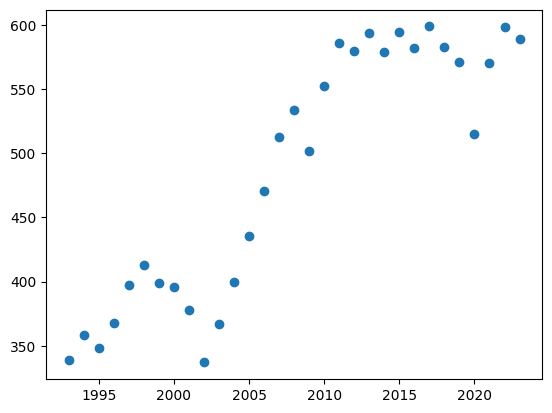

In [8]:
# Scatter plot of GDP
plt.scatter(x='Year', y='GDP (constant 2015 US$) [Billions]', data=gdp_data)
plt.show()


In [9]:
# We can see that there is a clear trend over time but It does not follow a linear pattern.
# We will try to fit a linear regression model to this data and see how it performs but we should keep in mind that it may not be the best.

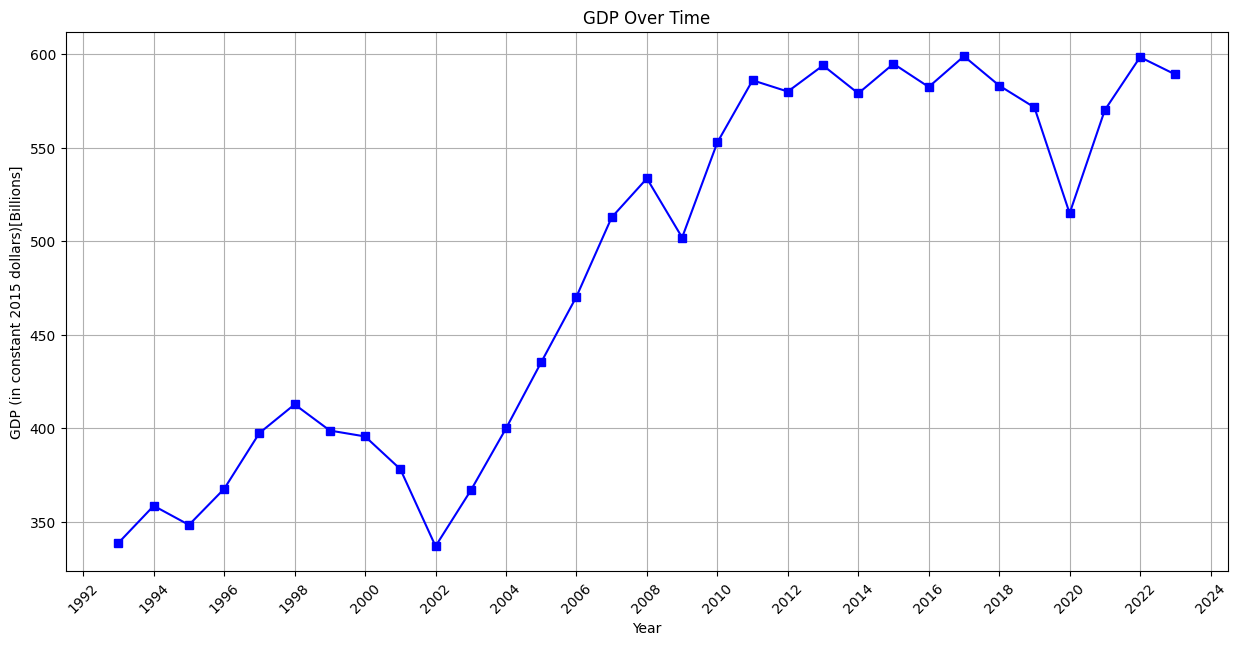

In [10]:
# Plot GDP over time
plt.figure(figsize=(15, 7))
plt.plot(gdp_data['Year'], gdp_data['GDP (constant 2015 US$) [Billions]'], marker='s', color='b')
plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (in constant 2015 dollars)[Billions]')
plt.grid(True)
# This will set the x-axis to show every 2 years.
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
# This will rotate the x-axis labels, making them more readable.
plt.xticks(rotation=45)
plt.show()

In [11]:
# Show specific statistics for GDP
gdp_data.describe()

,Year,GDP (constant 2015 US$) [Billions]
count,31.000000,31.000000
mean,2008.000000,485.414645
std,9.092121,97.726805
min,1993.000000,336.999000
25%,2000.500000,396.555000
50%,2008.000000,512.691000
75%,2015.500000,581.143500
max,2023.000000,598.791000


In [12]:
# Split the data into training and testing sets. Training set (80%) and testing set (20%).
X = gdp_data[['Year']].values.reshape(-1, 1)
y = gdp_data['GDP (constant 2015 US$) [Billions]'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict on the test set
y_pred = model.predict(X_test)

In [16]:
# Intercept of the model
c = model.intercept_
c

-19454.200636485093

In [17]:
# Slope of the model
m = model.coef_
m

array([9.93277156])

In [18]:
# Explicit equation of the model
Y_pred_model = m*X_train + c
Y_pred_model

array([[580.19960012],
       [461.0063414 ],
       [341.81308268],
       [381.54416892],
       [500.73742764],
       [391.47694048],
       [470.93911296],
       [451.07356984],
       [560.334057  ],
       [351.74585424],
       [361.6786258 ],
       [590.13237168],
       [371.61139736],
       [550.40128544],
       [600.06514324],
       [520.60297076],
       [639.79622948],
       [540.46851388],
       [411.3424836 ],
       [441.14079828],
       [480.87188452],
       [619.93068636],
       [530.53574232],
       [401.40971204]])

In [26]:
# Calculate the residuals
residuals = y_test - y_pred

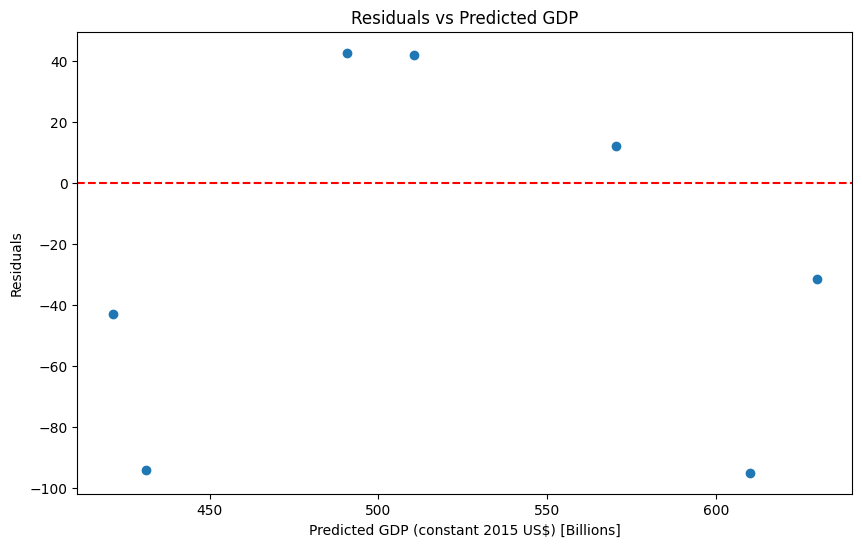

In [27]:
# Plot the residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted GDP (constant 2015 US$) [Billions]')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted GDP')
plt.show()

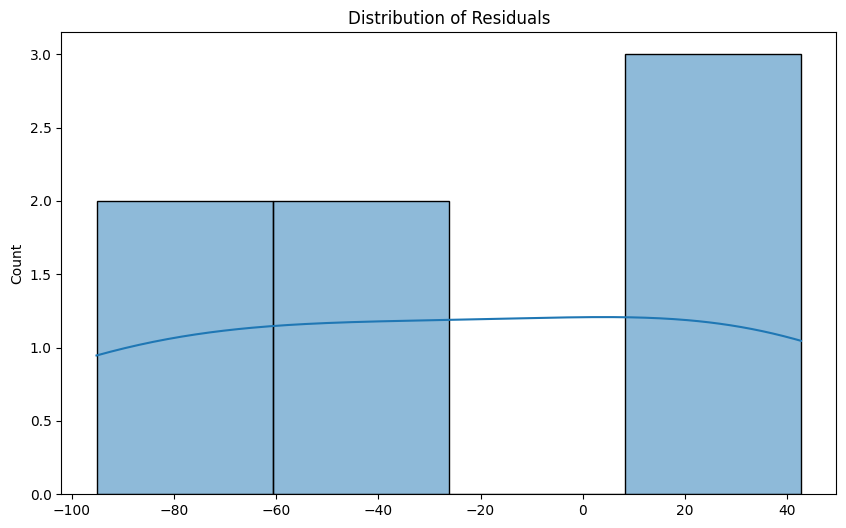

In [28]:
# Check the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

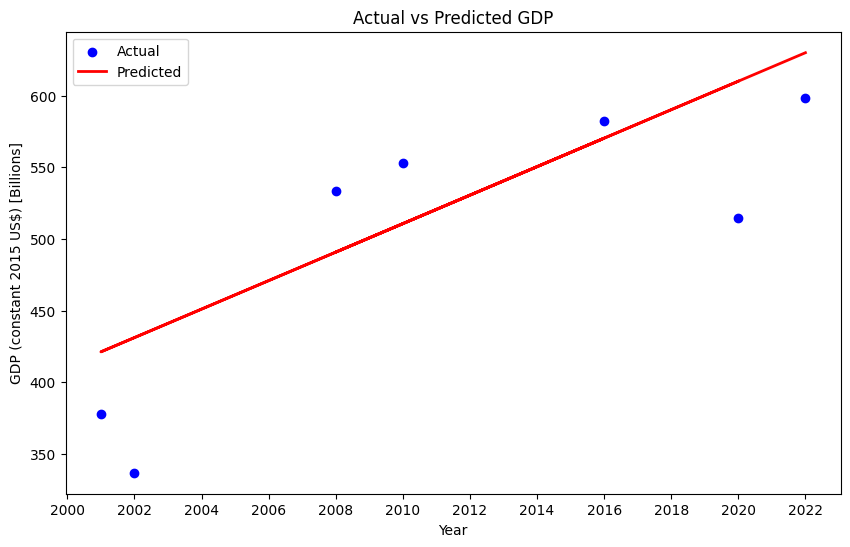

In [19]:
# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted GDP')
plt.xlabel('Year')
plt.ylabel('GDP (constant 2015 US$) [Billions]')
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.legend()
plt.show()

In [22]:
# Check performance metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 3501.8736984052657
R^2 Score: 0.6044881518122303


In [20]:
# Results
# The plot shows that the model is not very accurate in predicting the GDP values and the residuals show non-random patterns, it is clear that the model is underfitting the data.
# The residual distribution is not symmetric around zero, which indicates that the residuals do not follow a normal distribution.
# The R² score of 0.604 suggests that the model explains about 60.4% of the variance in GDP, this is not a great score but it is decent for a simple linear regression model.
# The Mean squared error of 3501.87 is quite high relative to the data, this also means that the model is not good at predicting the GDP values.
# The Root of the MSE is 59.18 and the standard deviation of the GDP is 97.726805. Although the RMSE is smaller than the std, it still indicates that the model is not very accurate in predicting the GDP values.
# All of this is expected since we are using a simple linear regression model with only one variable. The model can be improved by including more variables and using more advanced techniques.